# EDA 취합
(준호띵킹 대시보드에 있으면 좋겠는거)

- 공구마감률추이분석 : 주차별/월별 공구 생성 수 & 마감 상태 분포
- 거래 상태 요약 : 월별 거래 추이 시각화
- 리더 활동 통계 분석 : 리더 평균 공구 개설 수, 카테고리별 공구 활동 분포
- 지역분석 : 지역별 공구방, 참여자 수, 리더 수
- 카테고리별 인기 분석 : 평점 분포


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.io as pio
import warnings

from datetime import datetime, timedelta
from plotly.subplots import make_subplots



# matplotlib 한글 설정 (전체 설정은 생략하고 개별적으로 font 적용)
plt.rcParams['font.family'] = 'NanumBarunGothic'

## 공구마감률추이분석 : 주차별/월별 공구 생성 수 & 마감 상태 분포

In [7]:
# 데이터 로드
products_df = pd.read_csv('../data/products_df_final.csv')
group_product_df = pd.read_csv('../data/group_product_df_final.csv')
category_df = pd.read_csv('../data/category_df_final.csv')
participants_df = pd.read_csv('../data/participants_dummy_data_3000.csv')
group_boards_df = pd.read_csv('../data/group_boards_dummy_data_500.csv')
user_df = pd.read_csv('../data/user_df_final.csv', encoding='utf-8')

In [15]:
group_boards_df.head()

,group_board_id,title,content,location,status,deadline,created_at,updated_at,total_users,group_product_id
0,1,공구_1,Laboriosam rem placeat error asperiores. Culpa...,수원,마감임박,2025-06-28,2024-12-31,2025-03-26,4,189
1,2,공구_2,Nemo praesentium deleniti. Et corrupti porro i...,수원,모집마감,2025-05-30,2024-12-05,2025-02-24,10,111
2,3,공구_3,Aut ex iusto. A mollitia ut illum.,대구,마감임박,2025-06-23,2024-12-08,2025-04-23,12,331
3,4,공구_4,Soluta ab necessitatibus autem voluptatem. Ist...,대전,공구성공,2025-06-19,2025-01-07,2025-05-04,11,98
4,5,공구_5,Ea doloremque quidem. Error quam accusamus off...,부산,모집마감,2025-05-30,2025-03-21,2025-01-06,17,498


In [18]:
# 날짜 타입으로 변환
group_boards_df['created_at'] = pd.to_datetime(group_boards_df['created_at'])
group_boards_df['deadline'] = pd.to_datetime(group_boards_df['deadline'])

print(group_boards_df['status'].unique())

['마감임박' '모집마감' '공구성공' '모집중']


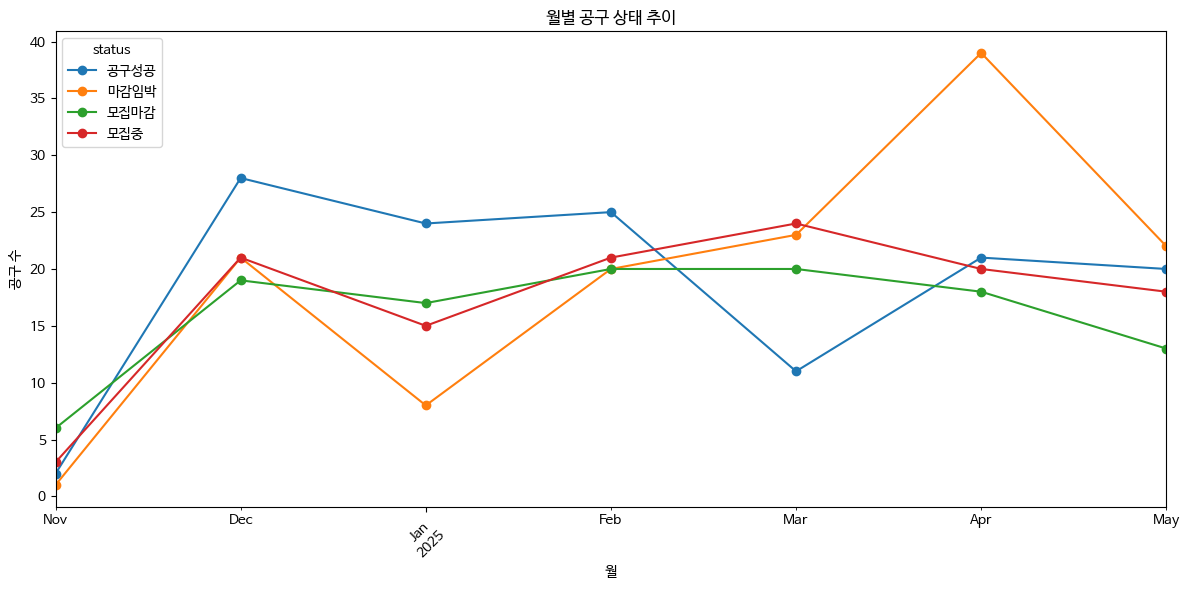

In [20]:
# 월 단위로 묶기
group_boards_df['year_month'] = group_boards_df['created_at'].dt.to_period('M')

# 상태별 마감률 추이 (월별)
monthly_status = group_boards_df.groupby(['year_month', 'status']).size().unstack(fill_value=0)

# 시각화
import matplotlib.pyplot as plt

monthly_status.plot(kind='line', marker='o', figsize=(12,6))
plt.title('월별 공구 상태 추이')
plt.xlabel('월')
plt.ylabel('공구 수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 거래 상태 요약 : 월별 거래 추이 시각화

In [23]:
# 데이터 로드
group_boards = pd.read_csv('../data/group_boards_dummy_data_500.csv')
participants = pd.read_csv('../data/participants_dummy_data_3000.csv')

In [24]:
# 날짜 컬럼 변환
group_boards['created_at'] = pd.to_datetime(group_boards['created_at'])
group_boards['deadline'] = pd.to_datetime(group_boards['deadline'])
group_boards['updated_at'] = pd.to_datetime(group_boards['updated_at'])
participants['joined_at'] = pd.to_datetime(participants['joined_at'])

# 월 컬럼 추가
group_boards['created_month'] = group_boards['created_at'].dt.to_period('M')
participants['joined_month'] = participants['joined_at'].dt.to_period('M')

# 공구 기간 계산
group_boards['duration_days'] = (group_boards['deadline'] - group_boards['created_at']).dt.days

# 요일 정보 추가
group_boards['created_weekday'] = group_boards['created_at'].dt.day_name()
participants['joined_weekday'] = participants['joined_at'].dt.day_name()

In [26]:
# 월별 공구 개설 수
monthly_creation = group_boards.groupby('created_month').size()
print(f"월별 공구 개설 수:")
for month, count in monthly_creation.items():
  print(f"- {month}: {count:,}개")

# 월별 공구 완료 수
monthly_completion = group_boards[group_boards['status'] == '공구성공'].groupby('created_month').size()
print(f"\n월별 공구 완료 수:")
for month, count in monthly_completion.items():
  print(f"- {month}: {count:,}개")

# 월별 신규 리더 수
monthly_new_leaders = participants[participants['role'] == '리더'].groupby('joined_month').size()
print(f"\n월별 신규 리더 수:")
for month, count in monthly_new_leaders.items():
  print(f"- {month}: {count:,}명")

# 월별 전체 참가자 수
monthly_participants = participants.groupby('joined_month').size()
print(f"\n월별 전체 참가자 수:")
for month, count in monthly_participants.items():
  print(f"- {month}: {count:,}명")

월별 공구 개설 수:
- 2024-11: 12개
- 2024-12: 89개
- 2025-01: 64개
- 2025-02: 86개
- 2025-03: 78개
- 2025-04: 98개
- 2025-05: 73개

월별 공구 완료 수:
- 2024-11: 2개
- 2024-12: 28개
- 2025-01: 24개
- 2025-02: 25개
- 2025-03: 11개
- 2025-04: 21개
- 2025-05: 20개

월별 신규 리더 수:
- 2024-11: 15명
- 2024-12: 262명
- 2025-01: 259명
- 2025-02: 239명
- 2025-03: 247명
- 2025-04: 265명
- 2025-05: 220명

월별 전체 참가자 수:
- 2024-11: 34명
- 2024-12: 521명
- 2025-01: 503명
- 2025-02: 482명
- 2025-03: 493명
- 2025-04: 523명
- 2025-05: 444명


In [27]:
# 월별 지표 종합 차트
fig_monthly = make_subplots(
    rows=2, cols=2,
    subplot_titles=['월별 공구 개설 수', '월별 공구 완료 수', '월별 신규 리더 수', '월별 참가자 수'],
    vertical_spacing=0.12
)

# 월별 공구 개설 수
fig_monthly.add_trace(
    go.Scatter(
        x=monthly_creation.index.astype(str),
        y=monthly_creation.values,
        mode='lines+markers',
        name="개설수",
        line=dict(color='blue', width=3)
    ),
    row=1, col=1
)

# 월별 공구 완료 수
fig_monthly.add_trace(
    go.Scatter(
        x=monthly_completion.index.astype(str),
        y=monthly_completion.values,
        mode='lines+markers',
        name="완료수",
        line=dict(color='green', width=3)
    ),
    row=1, col=2
)

# 월별 신규 리더 수
fig_monthly.add_trace(
    go.Bar(
        x=monthly_new_leaders.index.astype(str),
        y=monthly_new_leaders.values,
        name="신규리더",
        marker_color='orange'
    ),
    row=2, col=1
)

# 월별 참가자 수
fig_monthly.add_trace(
    go.Bar(
        x=monthly_participants.index.astype(str),
        y=monthly_participants.values,
        name="참가자수",
        marker_color='purple'
    ),
    row=2, col=2
)

fig_monthly.update_layout(
    title="월별 거래 흐름 분석",
    title_font_size=18,
    height=800,
    width=1200,
    showlegend=False
)
fig_monthly.show()

## 리더 활동 통계 분석 : 리더 평균 공구 개설 수, 카테고리별 공구 활동 분포

In [38]:
# 데이터 로드
products_df = pd.read_csv('../data/products_df_final.csv')
group_product_df = pd.read_csv('../data/group_product_df_final.csv')
category_df = pd.read_csv('../data/category_df_final.csv')
participants_df = pd.read_csv('../data/participants_dummy_data_3000.csv')
group_boards_df = pd.read_csv('../data/group_boards_dummy_data_500.csv')
user_df = pd.read_csv('../data/user_df_final.csv', encoding='utf-8')

In [37]:
# category_id로 조인
merged_df = pd.merge(products_df, group_products_df, on='category_id', how='inner')
print(f"\n=== Merged DataFrame ===")
print(f"Shape after join: {merged_df.shape}")
print(merged_df.head())


=== Merged DataFrame ===
Shape after join: (2377, 13)
   product_id  name  price                             img_url  rating  \
0           1  상품_1  93810  https://www.lorempixel.com/200/200     2.7   
1           1  상품_1  93810  https://www.lorempixel.com/200/200     2.7   
2           1  상품_1  93810  https://www.lorempixel.com/200/200     2.7   
3           1  상품_1  93810  https://www.lorempixel.com/200/200     2.7   
4           1  상품_1  93810  https://www.lorempixel.com/200/200     2.7   

                 product_url  created_at  category_id  group_product_id  \
0  http://www.jusighoesa.kr/  2025-03-03           25                 1   
1  http://www.jusighoesa.kr/  2025-03-03           25               119   
2  http://www.jusighoesa.kr/  2025-03-03           25               206   
3  http://www.jusighoesa.kr/  2025-03-03           25               210   
4  http://www.jusighoesa.kr/  2025-03-03           25               254   

  group_product_name  group_product_price  quanti

In [39]:
# 리더로 참여한 횟수가 2회 이상인 사용자 비율 계산
leader_participation = participants_df[participants_df['role'] == '리더'].groupby('user_id').size().reset_index()
leader_participation.columns = ['user_id', 'participation_count']

# 총 리더 수
total_unique_leaders = leader_participation['user_id'].nunique()

# 2회 이상 참여한 리더 수
repeated_leaders = leader_participation[leader_participation['participation_count'] >= 2]['user_id'].nunique()

# 재참여율 계산
repeated_rate = (repeated_leaders / total_unique_leaders) * 100

리더 1인당 평균 개설 수: 5.11회
최소 개설 수: 1회
최대 개설 수: 12회
중앙값 개설 수: 5.0회


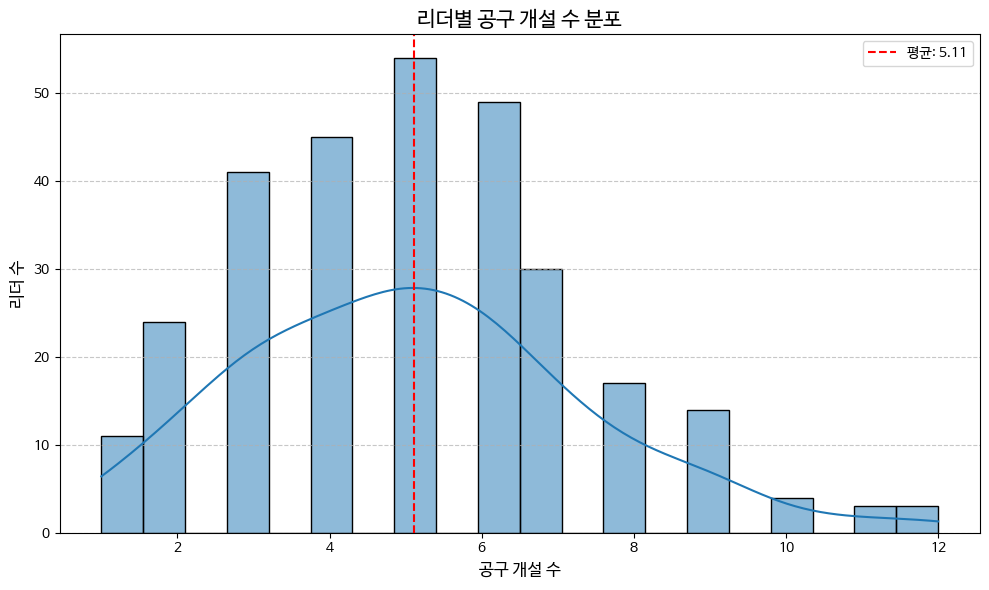

In [40]:
leader_avg_boards = leader_participation['participation_count'].mean()

# 리더별 개설 수 분포 히스토그램
plt.figure(figsize=(10, 6))
sns.histplot(leader_participation['participation_count'], bins=20, kde=True)
plt.axvline(x=leader_avg_boards, color='red', linestyle='--', label=f'평균: {leader_avg_boards:.2f}')
plt.title('리더별 공구 개설 수 분포', fontsize=15)
plt.xlabel('공구 개설 수', fontsize=12)
plt.ylabel('리더 수', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

print(f"리더 1인당 평균 개설 수: {leader_avg_boards:.2f}회")
print(f"최소 개설 수: {leader_participation['participation_count'].min()}회")
print(f"최대 개설 수: {leader_participation['participation_count'].max()}회")
print(f"중앙값 개설 수: {leader_participation['participation_count'].median()}회")

plt.tight_layout()
plt.show()

카테고리별 공구 게시판 수 (상위 5개):
간편조리식품: 26개
조리기구: 25개
식용유/참기름: 25개
제습/방향/탈취: 19개
목욕욕품: 18개


/tmp/ipykernel_42849/3245781638.py:26: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




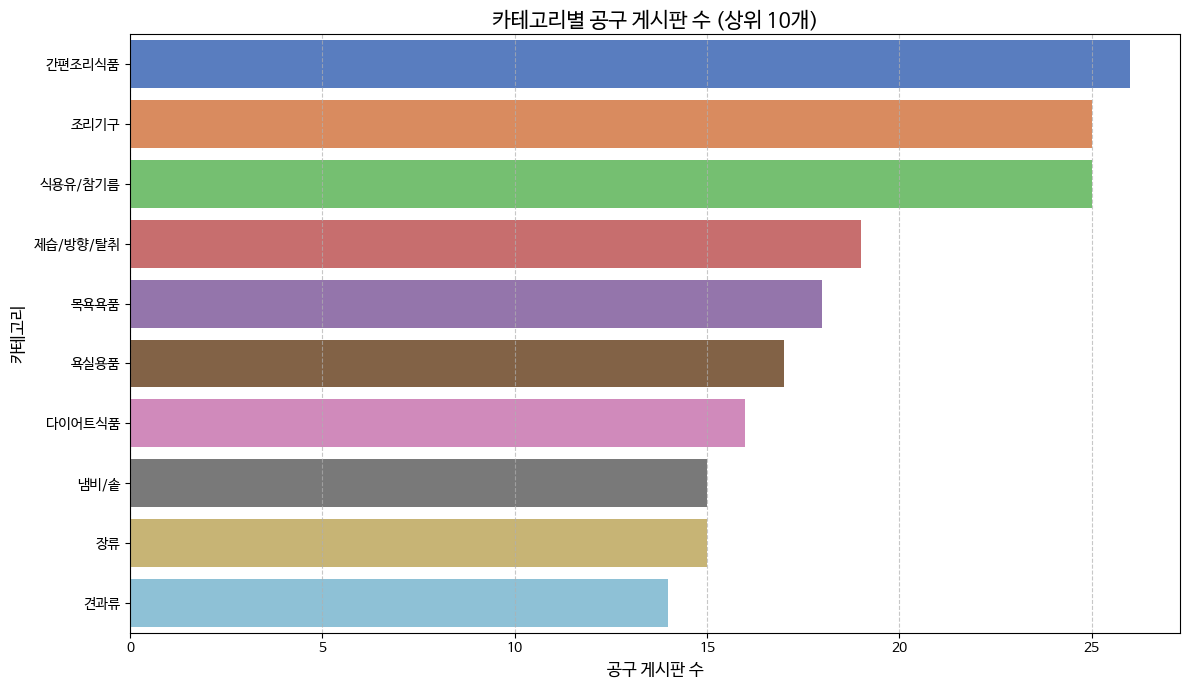

In [41]:
# 카테고리 대분류 정보 추출
large_categories = category_df[category_df['level'] == 'large'][['category_id', 'name']]
large_categories.columns = ['parent_category_id', 'large_category_name']

# 중분류 카테고리에 대분류 매핑
medium_categories = category_df[category_df['level'] == 'medium'].copy()
medium_categories = pd.merge(medium_categories, large_categories, on='parent_category_id', how='left')

# 공구 게시판과 공구 상품 정보 결합
group_product_info = pd.merge(group_boards_df, group_product_df,
                             left_on='group_product_id', right_on='group_product_id', how='left')

# 카테고리 정보 추가
group_product_info = pd.merge(group_product_info, category_df[['category_id', 'name']],
                             left_on='category_id', right_on='category_id', how='left')
group_product_info.rename(columns={'name': 'category_name'}, inplace=True)

# 카테고리별 공구 수 집계
category_distribution = group_product_info.groupby('category_name').size().reset_index()
category_distribution.columns = ['category_name', 'board_count']
category_distribution = category_distribution.sort_values('board_count', ascending=False)

# 상위 10개 카테고리 시각화
plt.figure(figsize=(12, 7))
top_categories = category_distribution.head(10)
sns.barplot(x='board_count', y='category_name', data=top_categories, palette='muted')
plt.title('카테고리별 공구 게시판 수 (상위 10개)', fontsize=15)
plt.xlabel('공구 게시판 수', fontsize=12)
plt.ylabel('카테고리', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

print("카테고리별 공구 게시판 수 (상위 5개):")
for i, row in top_categories.head(5).iterrows():
    print(f"{row['category_name']}: {row['board_count']}개")

plt.tight_layout()
plt.show()

## 카테고리별 인기 분석 : 평점 분포

In [42]:
# 데이터 로드
products_df = pd.read_csv('../data/products_df_final.csv')
group_products_df = pd.read_csv('../data/group_product_df_final.csv')

Text(0, 0.5, '빈도')

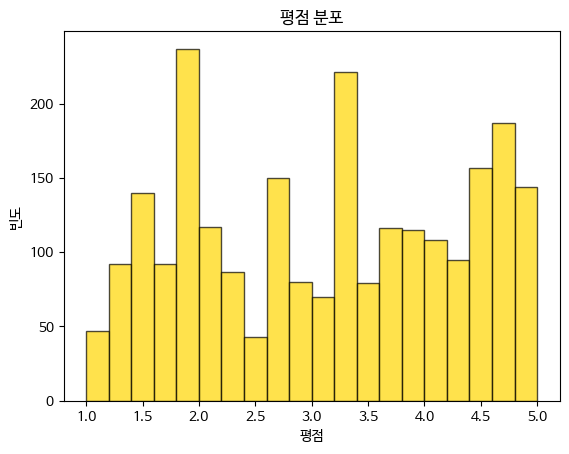

In [44]:
# 평점 분포
plt.hist(merged_df['rating'], bins=20, alpha=0.7, color='gold', edgecolor='black')
plt.title('평점 분포')
plt.xlabel('평점')
plt.ylabel('빈도')

## 지역분석 : 지역별 공구방, 참여자 수, 리더 수

In [47]:
# 데이터 로드
products_df = pd.read_csv('../data/products_df_final.csv')
group_product_df = pd.read_csv('../data/group_product_df_final.csv')
category_df = pd.read_csv('../data/category_df_final.csv')
participants_df = pd.read_csv('../data/participants_dummy_data_3000.csv')
group_boards_df = pd.read_csv('../data/group_boards_dummy_data_500.csv')
user_df = pd.read_csv('../data/user_df_final.csv', encoding='utf-8')

In [49]:
participants_df.head()

,participant_id,chat_room_id,group_board_id,role,joined_at,payment_status,user_id
0,1,328,461,참여자,2025-04-01,납부완료,34
1,2,58,366,리더,2024-12-19,미납,163
2,3,13,228,참여자,2024-12-02,미납,176
3,4,380,45,참여자,2025-04-20,납부완료,249
4,5,141,415,리더,2025-01-20,납부완료,109


In [50]:
group_boards_df.head()

,group_board_id,title,content,location,status,deadline,created_at,updated_at,total_users,group_product_id
0,1,공구_1,Laboriosam rem placeat error asperiores. Culpa...,수원,마감임박,2025-06-28,2024-12-31,2025-03-26,4,189
1,2,공구_2,Nemo praesentium deleniti. Et corrupti porro i...,수원,모집마감,2025-05-30,2024-12-05,2025-02-24,10,111
2,3,공구_3,Aut ex iusto. A mollitia ut illum.,대구,마감임박,2025-06-23,2024-12-08,2025-04-23,12,331
3,4,공구_4,Soluta ab necessitatibus autem voluptatem. Ist...,대전,공구성공,2025-06-19,2025-01-07,2025-05-04,11,98
4,5,공구_5,Ea doloremque quidem. Error quam accusamus off...,부산,모집마감,2025-05-30,2025-03-21,2025-01-06,17,498


In [53]:
# category_id로 조인
df = pd.merge(participants_df, group_boards_df, on='group_board_id', how='inner')
print(f"\n=== Merged DataFrame ===")
print(f"Shape after join: {df.shape}")
print(df.head())


=== Merged DataFrame ===
Shape after join: (3000, 16)
   participant_id  chat_room_id  group_board_id role   joined_at  \
0               1           328             461  참여자  2025-04-01   
1               2            58             366   리더  2024-12-19   
2               3            13             228  참여자  2024-12-02   
3               4           380              45  참여자  2025-04-20   
4               5           141             415   리더  2025-01-20   

  payment_status  user_id   title  \
0           납부완료       34  공구_461   
1             미납      163  공구_366   
2             미납      176  공구_228   
3           납부완료      249   공구_45   
4           납부완료      109  공구_415   

                                             content location status  \
0  Totam veniam id rem.\nMollitia cupiditate vel ...       광주   공구성공   
1       Iste unde cumque sapiente. Quod est aliquam.       서울   공구성공   
2  Dolore aliquid accusamus consequatur in deseru...       수원   공구성공   
3  Cumque aspernatur offi

/tmp/ipykernel_42849/2057973180.py:25: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_42849/2057973180.py:30: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_42849/2057973180.py:35: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




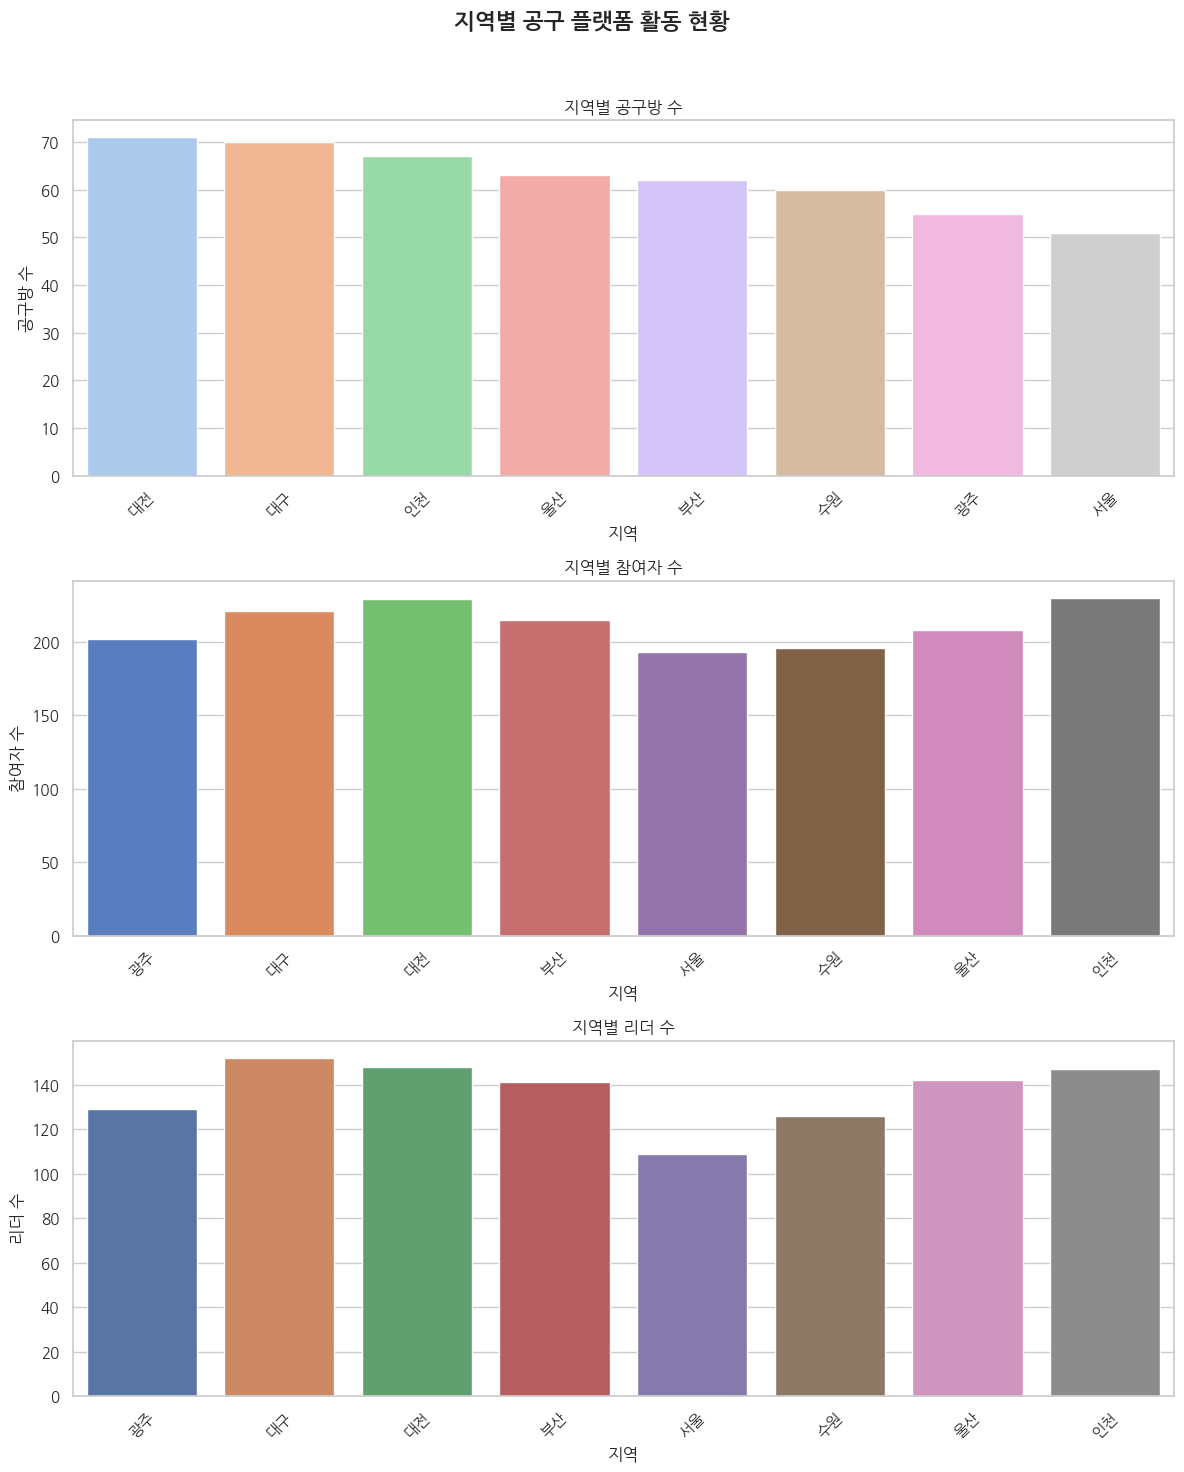

In [54]:
# 스타일 적용
sns.set(style="whitegrid")
plt.rcParams['font.family'] = 'NanumGothic'  # 한글 폰트 (Colab에서는 설치 필요)
plt.rcParams['axes.unicode_minus'] = False

# 공구방 단위로 중복 제거
group_boards = df.drop_duplicates(subset='group_board_id')
region_group_counts = group_boards['location'].value_counts().reset_index()
region_group_counts.columns = ['지역', '공구방 수']

# 참여자 수
region_participant_counts = df.groupby('location')['user_id'].nunique().reset_index()
region_participant_counts.columns = ['지역', '참여자 수']

# 리더 수
leaders = df[df['role'] == '리더']
region_leader_counts = leaders.groupby('location')['user_id'].nunique().reset_index()
region_leader_counts.columns = ['지역', '리더 수']

# Figure 구성
fig, axs = plt.subplots(3, 1, figsize=(12, 15))
fig.suptitle("지역별 공구 플랫폼 활동 현황", fontsize=16, fontweight='bold')

# 1. 공구방 수
sns.barplot(data=region_group_counts, x='지역', y='공구방 수', ax=axs[0], palette='pastel')
axs[0].set_title("지역별 공구방 수")
axs[0].tick_params(axis='x', rotation=45)

# 2. 참여자 수
sns.barplot(data=region_participant_counts, x='지역', y='참여자 수', ax=axs[1], palette='muted')
axs[1].set_title("지역별 참여자 수")
axs[1].tick_params(axis='x', rotation=45)

# 3. 리더 수
sns.barplot(data=region_leader_counts, x='지역', y='리더 수', ax=axs[2], palette='deep')
axs[2].set_title("지역별 리더 수")
axs[2].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # 타이틀 영역 확보
plt.show()
